In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
x
import warnings

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

NameError: name 'x' is not defined

In [3]:
dataset=pd.read_csv('dataset.csv')

In [4]:
dataset.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
dataset = dataset.dropna(how="all") # remove samples with all missing values


In [6]:
dataset=dataset[~dataset.duplicated()]

In [7]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
dataset.shape  # 21 columns we have

(7043, 21)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors='coerce')
dataset.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 
dataset.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = dataset.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [210]:
df_dummies2=pd.get_dummies(df2)

In [211]:
df_dummies.shape

(7032, 46)

In [11]:
df_dummies.head().T

,0,1,2,3,4
SeniorCitizen,0.00,0.00,0.00,0.00,0.00
tenure,1.00,34.00,2.00,45.00,2.00
MonthlyCharges,29.85,56.95,53.85,42.30,70.70
TotalCharges,29.85,1889.50,108.15,1840.75,151.65
Churn,0.00,0.00,1.00,0.00,1.00
gender_Female,1.00,0.00,0.00,0.00,1.00
gender_Male,0.00,1.00,1.00,1.00,0.00
Partner_No,0.00,1.00,1.00,1.00,1.00
Partner_Yes,1.00,0.00,0.00,0.00,0.00
Dependents_No,1.00,1.00,1.00,1.00,1.00


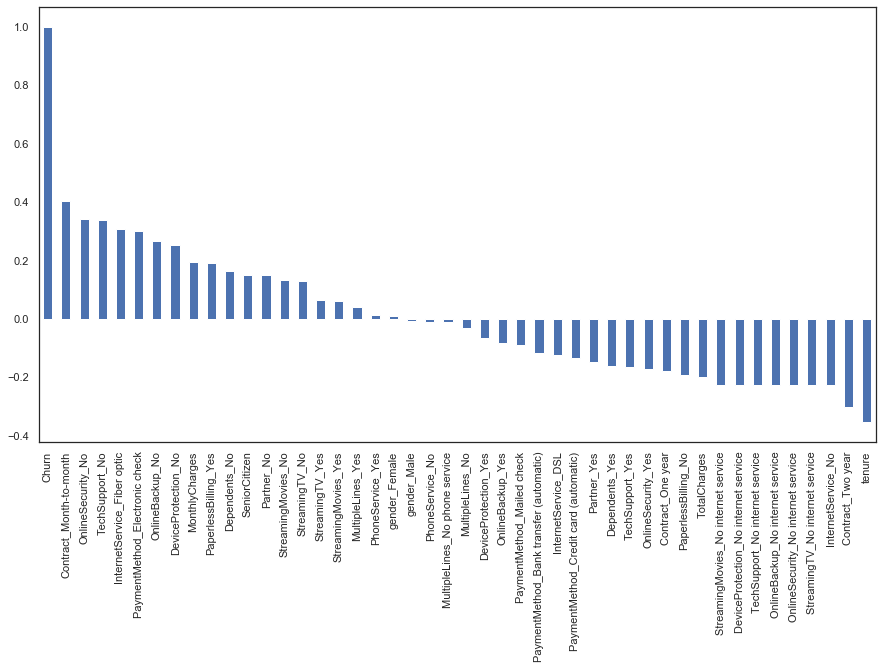

In [15]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [12]:
df_dummies.nunique()

SeniorCitizen                                 2
tenure                                       72
MonthlyCharges                             1584
TotalCharges                               6530
Churn                                         2
gender_Female                                 2
gender_Male                                   2
Partner_No                                    2
Partner_Yes                                   2
Dependents_No                                 2
Dependents_Yes                                2
PhoneService_No                               2
PhoneService_Yes                              2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                             2
OnlineSecurity_No internet service      

In [47]:
X = df_dummies.drop('Churn', 1)
y = df_dummies['Churn']

In [48]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [212]:
X.shape

(7032, 45)

#### ML Algo/ Logistic Regression

In [49]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
y_test.shape

(1407,)

In [54]:
y.shape

(7032,)

#### Feature Engineering

In [15]:
#Classification report Lofistic Regression
from sklearn.metrics import classification_report, accuracy_score

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
(min(weights[weights<0]))

-0.5006767428628323

In [83]:
pd.Series(sorted(model.coef_[0])

[-0.5006767428628323,
 -0.3657335888886245,
 -0.25840544121704107,
 -0.24341386654822872,
 -0.23758934670190626,
 -0.21864413170786992,
 -0.21327424469559733,
 -0.209973720670209,
 -0.18419571479523444,
 -0.16609896527360393,
 -0.1245296403556894,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.1201469386786349,
 -0.10662491702760366,
 -0.08696503829399743,
 -0.08659224261829646,
 -0.0856065644422216,
 -0.08527282997094823,
 -0.061326479770435885,
 -0.06034080159437252,
 -0.05518243307225482,
 -0.05146286262314377,
 -0.0397613095091889,
 -0.035980335562499306,
 -0.022403403856968998,
 0.0002565234492507347,
 0.003068826663895066,
 0.009194230028473029,
 0.058486724436923036,
 0.06017893275997987,
 0.06634120048295021,
 0.07983881149357724,
 0.11147239700439342,
 0.11147239700439342,
 0.21080324116789123,
 0.21662776101421163,
 0.22383406542774537,
 0.2548244984793226,
 0.33894748335460934,
 0.563717

In [27]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [28]:
classifiers = [['SVM :', SVC()],
               ['Neural Network :', MLPClassifier()],
               ['LogisticRegression :', LogisticRegression()]]

In [29]:
for name, classifier in classifiers:
    classfier=classifier
    classifier.fit(X_train, y_train)
    predictions=classfier.predict(X_test)

In [30]:
predictions_df[name.strip(":")]=predictions
print(name, accuracy_score(y_test, predictions))

NameError: name 'predictions_df' is not defined

In [153]:
print(name, accuracy_score(y_test, predictions))

LogisticRegression : 0.8102345415778252


In [113]:
weights=pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values()

Contract_Two year                         -0.500677
InternetService_DSL                       -0.365734
PhoneService_Yes                          -0.258405
OnlineSecurity_Yes                        -0.243414
TechSupport_Yes                           -0.237589
MultipleLines_No                          -0.218644
PaperlessBilling_No                       -0.213274
Contract_One year                         -0.209974
PaymentMethod_Credit card (automatic)     -0.184196
PaymentMethod_Mailed check                -0.166099
Dependents_Yes                            -0.124530
OnlineSecurity_No internet service        -0.120147
TechSupport_No internet service           -0.120147
StreamingTV_No internet service           -0.120147
StreamingMovies_No internet service       -0.120147
DeviceProtection_No internet service      -0.120147
InternetService_No                        -0.120147
OnlineBackup_No internet service          -0.120147
StreamingTV_No                            -0.106625
OnlineBackup

In [31]:
from sklearn import metrics
model2=SVC()
pred=model2.fit(X_train,y_train)
prediction_test_2 = model2.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test_2))

0.7931769722814499


In [32]:
#Before Tuning
print(classification_report(y_test,prediction_test_2))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1052
           1       0.66      0.37      0.47       355

    accuracy                           0.79      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



In [33]:
model2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

##### Grid Search

In [21]:
from sklearn.metrics import confusion_matrix , accuracy_score, f1_score

In [34]:
conf_matr=confusion_matrix(y_test, predictions)
conf_matr
acc=accuracy_score(y_test, predictions)
f1=f1_score(y_test, predictions)

In [35]:
conf_matr=confusion_matrix(y_test, pred_clf_cv)
conf_matr
acc=accuracy_score(y_test, pred_clf_cv)
f1=f1_score(y_test, pred_clf_cv)

NameError: name 'pred_clf_cv' is not defined

In [43]:
accuracy_score(y_test, predict_logistic)

NameError: name 'predict_logistic' is not defined

In [22]:
from sklearn.metrics import classification_report

In [148]:
print (metrics.accuracy_score(y_test, pred_clf_cv))

0.7853589196872779


In [149]:
#Classification report for random forest with cv
print(classification_report(y_test,pred_clf_cv ))  



              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1052
           1       0.59      0.48      0.53       355

    accuracy                           0.79      1407
   macro avg       0.71      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [156]:
print(name, accuracy_score(y_test, predictions)) 
print(classification_report(y_test, predictions))

LogisticRegression : 0.8102345415778252
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1052
           1       0.65      0.55      0.59       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [151]:
# Classification Report SVC
print (classification_report(y_test, prediction_test_2))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1052
           1       0.66      0.37      0.47       355

    accuracy                           0.79      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



In [167]:
svco = SVC(kernel='linear', class_weight='balanced', C=1.0, random_state=0)
svc_model=svco.fit(X_train, y_train)

In [168]:
svc_predict=svco.predict(X_test)
print(accuracy_score(y_test,svc_predict ))

0.7569296375266524


In [172]:
svc_model

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [170]:
model2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [159]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(priors=None)
gnb.fit(X_train, y_train)
clf_new=gnb.predict(X_test)
print(accuracy_score(y_test, clf_new))

0.6865671641791045


In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [165]:
X

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

### Tuning SVM parameters

In [57]:
gsc = GridSearchCV(
        estimator=SVC(kernel='rbf'),
        param_grid={
            'C': [0.1, 1, 100, 1000],
            'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [58]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   5.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   5.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   5.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.565, total=   5.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.572, total=   5.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.567, total=   6.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   4.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.642, total=   5.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.641, total=   5.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.693, total=   5.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.698, total=   7.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.705, total=   5.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.798, total=   9.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.793, total=   7.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.802, total=   6.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.802, total=   6.6s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [179]:
#After tuning
print(grid.best_params_) 
print(grid.best_estimator_) 



{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [184]:
svc_model

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [185]:
model2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [196]:
#GridSearch CV
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1052
           1       0.66      0.43      0.52       355

    accuracy                           0.80      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [191]:
print(round(accuracy_score(y_test,grid_predictions),4))


0.7996


In [192]:
#Before Tuning
print(round(accuracy_score(y_test,prediction_test_2),4))


0.7932


In [38]:
from sklearn import metrics
model2=SVC()
pred=model2.fit(X_train,y_train)
prediction_test_2 = model2.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test_2))

0.7931769722814499


In [199]:
 from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, grid_predictions)

0.6774701440582659

In [200]:
roc_auc_score(y_test, prediction_test_2)

0.6526629357896429

In [209]:
from sklearn.utils import resampleample

In [ ]:
prediction_test_2

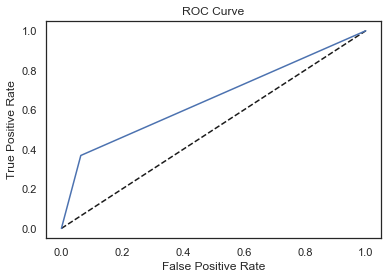

AUC: 0.6526629357896429
AUC scores computed using 5-fold cross-validation: [0.72817866 0.742583   0.69967671 0.70275774 0.7342805 ]


In [40]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_test_2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, prediction_test_2)))
cv_auc = cross_val_score(model2,X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

In [42]:
#Applying SVMsmote
from collections import Counter
from imblearn.over_sampling import SVMSMOTE

In [ ]:
from sklearn.svm import OneClassSVM
 clf = OneClassSVM(gamma='auto').fit(X)



In [ ]:
from sklearn.svm import OneClassSVM
 clf = OneClassSVM(gamma='auto').fit(X)



In [60]:
sm=SVMSMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5163, 1: 5163})


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=101)

In [63]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.510, total=   5.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.511, total=   5.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.512, total=   6.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.565, total=   5.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.572, total=   5.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.567, total=   6.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.636, total=   5.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.642, total=   4.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.641, total=   5.7s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.693, total=   6.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.698, total=   8.5s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.705, total=   6.3s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.798, total=   7.6s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.793, total=   7.4s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.802, total=   6.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.802, total=   8.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  6.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [64]:
grid_predictions = grid.predict(X_test) 
# print classification report 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1030
           1       0.79      0.90      0.84      1036

    accuracy                           0.83      2066
   macro avg       0.84      0.83      0.83      2066
weighted avg       0.84      0.83      0.83      2066



In [65]:
print(round(accuracy_score(y_test,grid_predictions),4))

0.8291


(2066,)